## EDA HeartDisease

In [33]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf'
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
matplotlib.rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)


## 01. 데이터 수집 및 로드

In [34]:
df = pd.read_csv('data/heart_2022_with_nans.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

## 02. 데이터 구조 및 변수 이해

In [35]:
print(df.shape)
print(df.dtypes)
print(df.columns)
df.head()


(445132, 40)
State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage          

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


## 03.주요 데이터 요약 및 기술통계

In [49]:
df.describe()

categorical_vars = [
    'Sex','GeneralHealth','HadHeartAttack','HadAngina',
    'HadCOPD','HadAsthma','CovidPos','PneumoVaxEver','HIVTesting'
]

for col in categorical_vars:
    print("\n=== ", col, " ===")
    print(df[col].value_counts(dropna=False))



===  Sex  ===
Sex
Female    235893
Male      209239
Name: count, dtype: int64

===  GeneralHealth  ===
GeneralHealth
Very good    148444
Good         143598
Excellent     71878
Fair          60273
Poor          19741
NaN            1198
Name: count, dtype: int64

===  HadHeartAttack  ===
HadHeartAttack
No     416959
Yes     25108
NaN      3065
Name: count, dtype: int64

===  HadAngina  ===
HadAngina
No     414176
Yes     26551
NaN      4405
Name: count, dtype: int64

===  HadCOPD  ===
HadCOPD
No     407257
Yes     35656
NaN      2219
Name: count, dtype: int64

===  HadAsthma  ===
HadAsthma
No     376665
Yes     66694
NaN      1773
Name: count, dtype: int64

===  CovidPos  ===
CovidPos
No                                                               270055
Yes                                                              110877
NaN                                                               50764
Tested positive using home test without a health professional     13436
Name: count, dtyp

## 04. 결측치 및 이상치 탐색

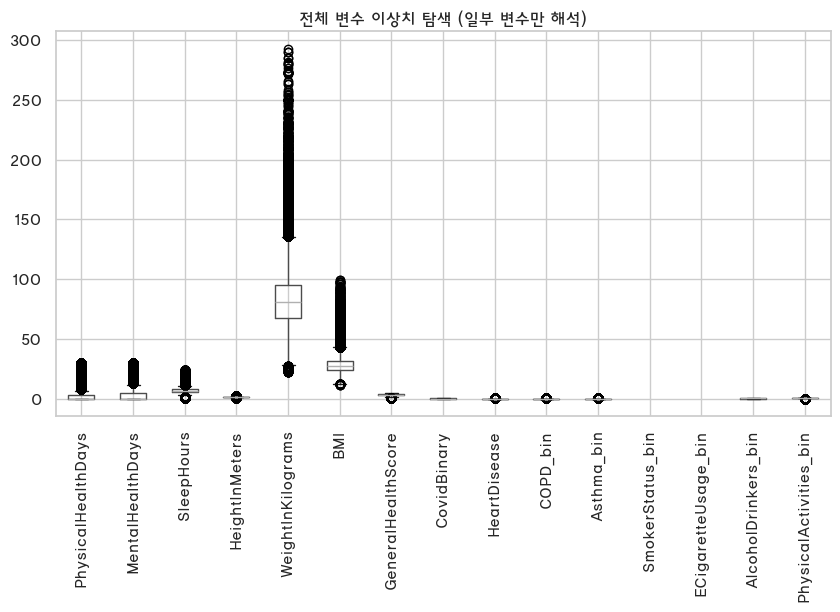

In [59]:
# 결측치
df.isnull().sum()

# 이상치 탐색
plt.figure(figsize=(10,5))
df.boxplot()
plt.title("전체 변수 이상치 탐색 (일부 변수만 해석)")
plt.xticks(rotation=90)
plt.show()



## 05. 변수 분포 시각화

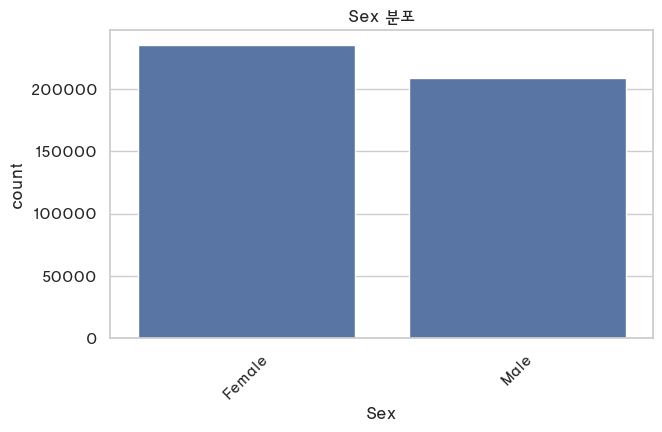

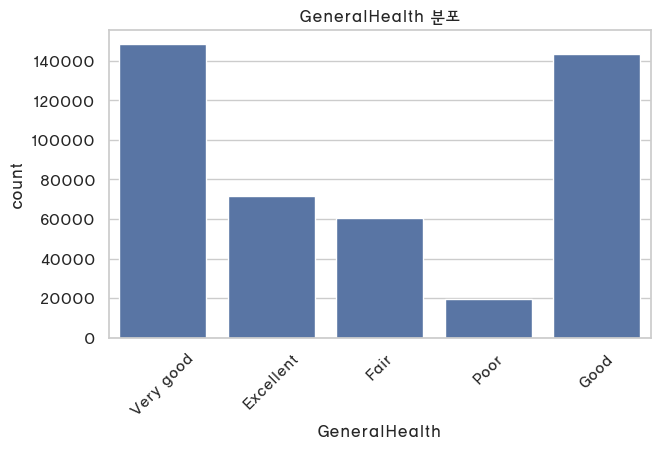

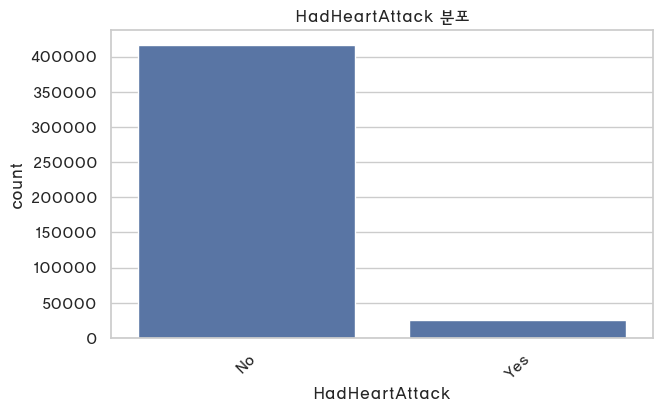

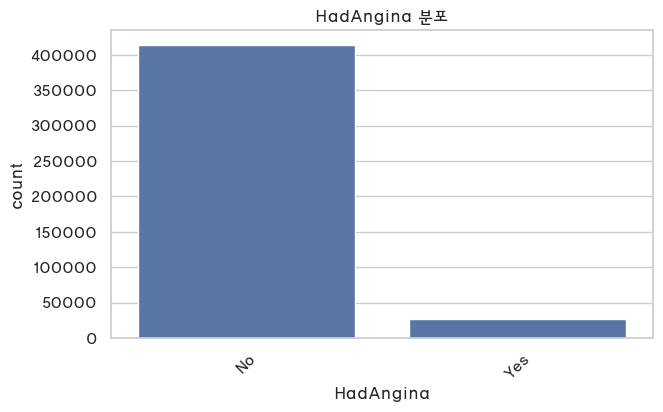

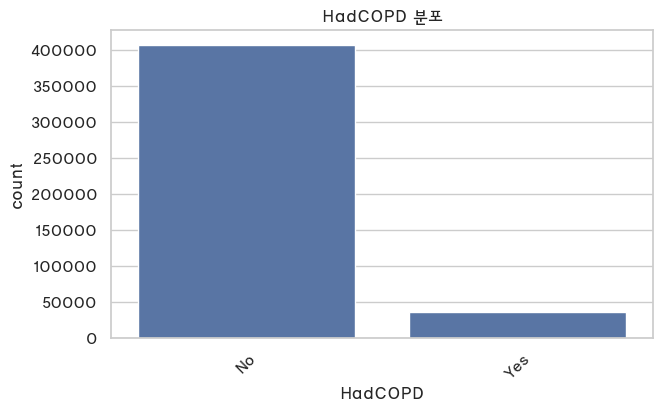

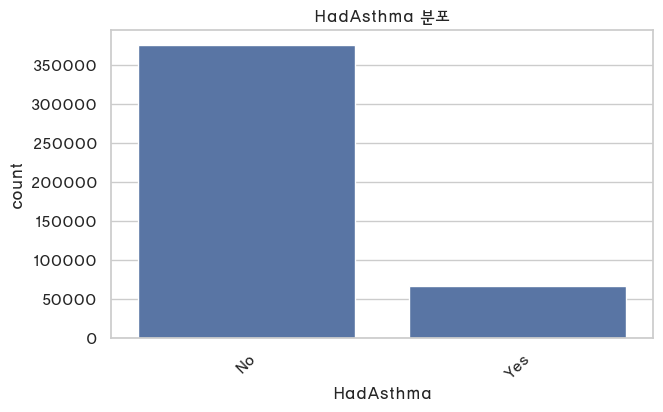

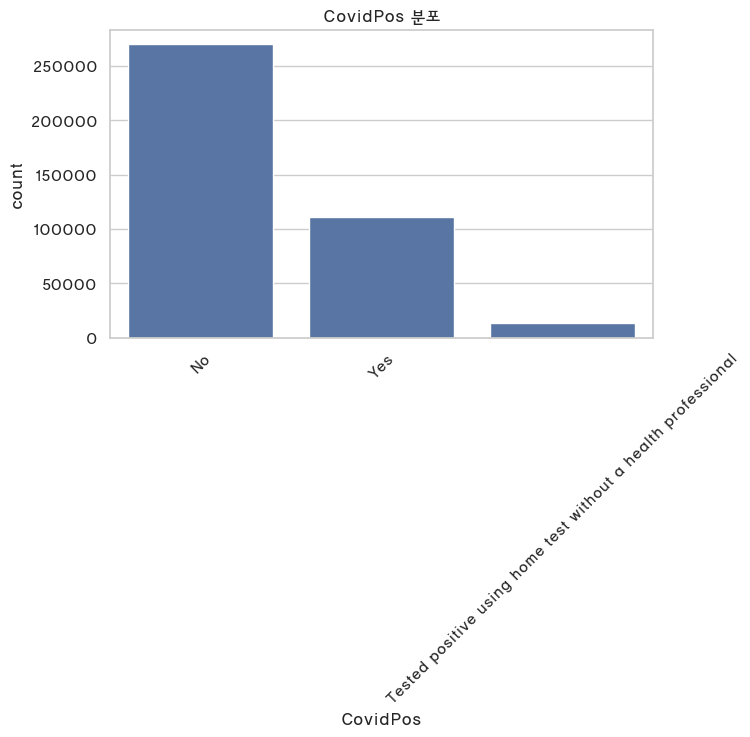

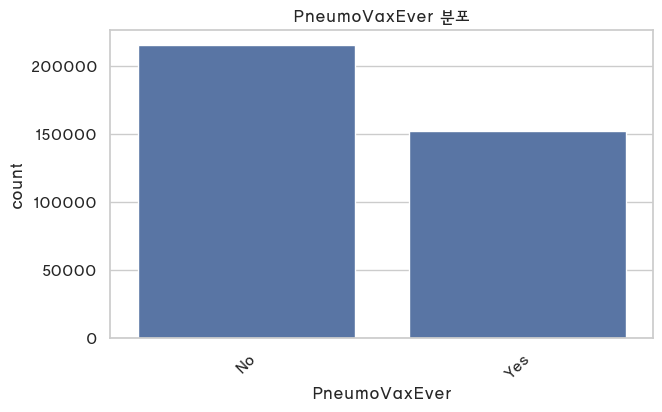

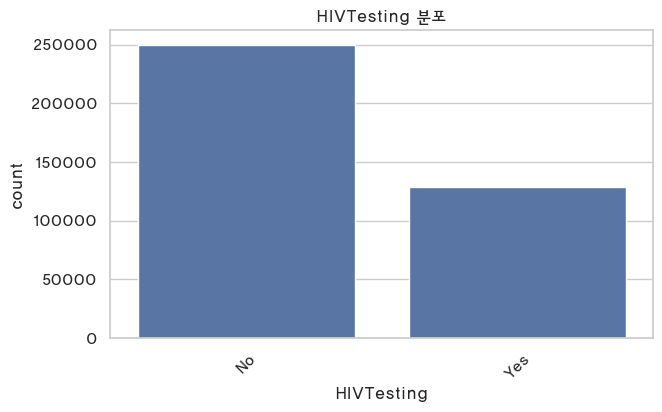

In [ ]:
# 05. 변수 분포 확인 (내가 사용하는 변수만)

for col in categorical_vars:
    plt.figure(figsize=(7,4))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} 분포")
    plt.xticks(rotation=45)
    plt.show()

# Sex : 여자가 더 많다.
# 

## 06. 변수 간 관계 시각화

In [53]:
# 06. 변수 간 관계 시각화 (범주형끼리 → 교차표)
pd.crosstab(df['CovidPos'], df['HadCOPD'])
pd.crosstab(df['CovidPos'], df['HadAsthma'])


HadAsthma,No,Yes
CovidPos,,
No,230956,38083
Tested positive using home test without a health professional,11359,2035
Yes,90850,19666


## 07. 상관관계 및 교차분석

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_7744\4060840101.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CovidBinary'] = df['CovidPos'].replace({


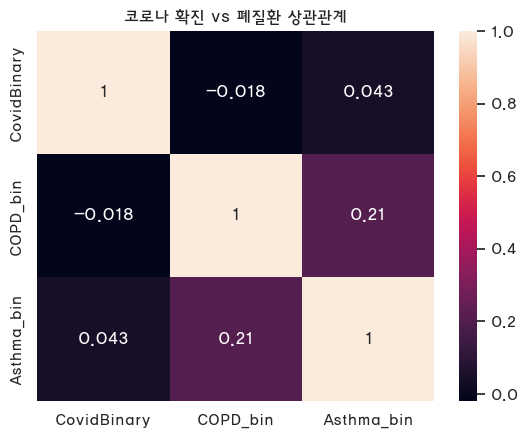

In [55]:
# 07. 상관관계 및 교차분석
# (범주형 이진변수로 변환 후 상관계수 계산)
def yn(x):
    return 1 if x=="Yes" else 0 if x=="No" else np.nan

df['COPD_bin'] = df['HadCOPD'].apply(yn)
df['Asthma_bin'] = df['HadAsthma'].apply(yn)

df['CovidBinary'] = df['CovidPos'].replace({
    'Yes': 1,
    'Tested positive using home test without a health professional': 1,
    'No': 0
})

sns.heatmap(df[['CovidBinary','COPD_bin','Asthma_bin']].corr(),
            annot=True)
plt.title("코로나 확진 vs 폐질환 상관관계")
plt.show()


## 08. 데이터 전처리

In [60]:
# 건강상태 점수 변환
health_map = {
    'Excellent': 5, 'Very good': 4, 'Good': 3,
    'Fair': 2, 'Poor': 1
}
df['GeneralHealthScore'] = df['GeneralHealth'].map(health_map)


## 09. Feature Engineering

In [61]:
# HIV 분석용 건강습관 변환
behavior_cols = ['SmokerStatus','ECigaretteUsage','AlcoholDrinkers','PhysicalActivities']
for c in behavior_cols:
    df[c+'_bin'] = df[c].apply(yn)

# 심혈관질환 변수 생성
df['HeartDisease'] = df[['HadHeartAttack','HadAngina']].apply(
    lambda x: 1 if 'Yes' in x.values else 0, axis=1
)
    


### A. 코로나 확진 경험 vs 심혈관질환율 비교

CovidBinary
0.0    0.095951
1.0    0.078503
Name: HeartDisease, dtype: float64


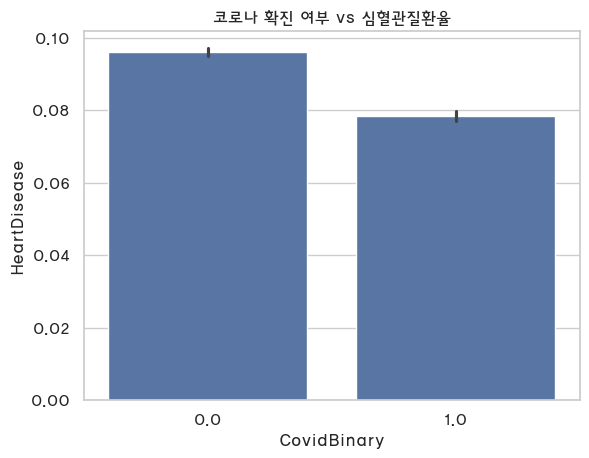

In [62]:
print(df.groupby("CovidBinary")["HeartDisease"].mean())

sns.barplot(x="CovidBinary", y="HeartDisease", data=df)
plt.title("코로나 확진 여부 vs 심혈관질환율")
plt.show()


### B. 폐렴백신 접종자군의 평균 건강상태

PneumoVaxEver
No     3.549030
Yes    3.245763
Name: GeneralHealthScore, dtype: float64


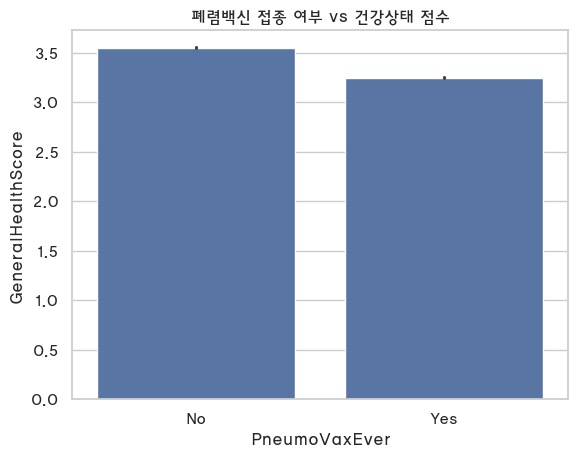

In [63]:
print(df.groupby("PneumoVaxEver")["GeneralHealthScore"].mean())

sns.barplot(x="PneumoVaxEver", y="GeneralHealthScore", data=df)
plt.title("폐렴백신 접종 여부 vs 건강상태 점수")
plt.show()


### C. HIV 검사 여부와 건강습관 차이

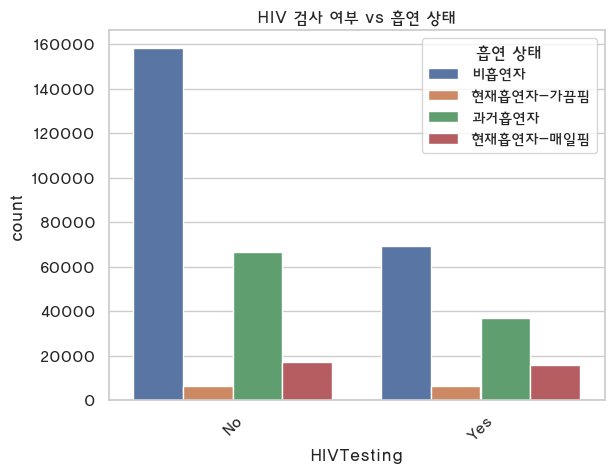

In [67]:
sns.countplot(x='HIVTesting', hue='SmokerStatus', data=df)
plt.title("HIV 검사 여부 vs 흡연 상태")
plt.xticks(rotation=45)
plt.legend(
    title='흡연 상태',
    labels=['비흡연자', '현재흡연자-가끔핌' , '과거흡연자', '현재흡연자-매일핌']
)

plt.show()


### D. 코로나 vs 폐질환(COPD, Asthma)

COPD_bin        0.0    1.0
CovidBinary               
0.0          246102  22685
1.0          114685   9124
Asthma_bin      0.0    1.0
CovidBinary               
0.0          230956  38083
1.0          102209  21701


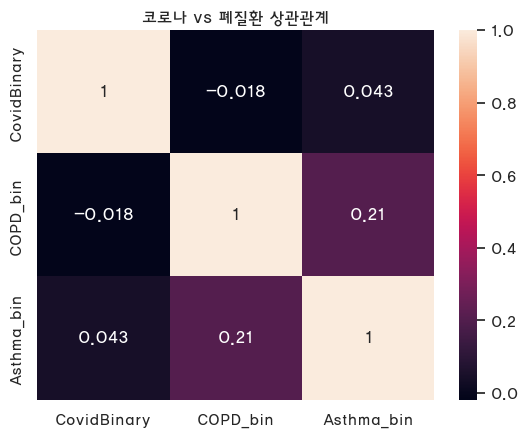

In [69]:
print(pd.crosstab(df["CovidBinary"], df["COPD_bin"]))
print(pd.crosstab(df["CovidBinary"], df["Asthma_bin"]))

sns.heatmap(df[['CovidBinary','COPD_bin','Asthma_bin']].corr(),
            annot=True)
plt.title("코로나 vs 폐질환 상관관계")
plt.show()
